In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers


In [2]:
forecasting = 20

In [3]:
df = pd.read_csv('../omona/trainset/J0003_0024_0222_20110307012737_cell_7.csv', encoding='utf8')
df

,MeasuredDate,CellNo,Resistance,Volt,Temp
0,2011.3.7 6:27,7,0.296,2.25,-20
1,2011.3.7 18:29,7,0.297,2.25,-20
2,2011.3.8 6:29,7,0.298,2.25,-20
3,2011.3.8 18:29,7,0.298,2.25,-20
4,2011.3.9 6:29,7,0.296,2.25,-20
...,...,...,...,...,...
250,2011.8.30 5:28,7,0.619,2.29,-20
251,2011.8.30 17:28,7,0.620,2.30,-20
252,2011.8.31 5:28,7,0.623,2.30,-20
253,2011.8.31 16:09,7,0.639,2.30,-20


In [4]:
df = df['Resistance']
df

0      0.296
1      0.297
2      0.298
3      0.298
4      0.296
       ...  
250    0.619
251    0.620
252    0.623
253    0.639
254    0.634
Name: Resistance, Length: 255, dtype: float64

<AxesSubplot:>

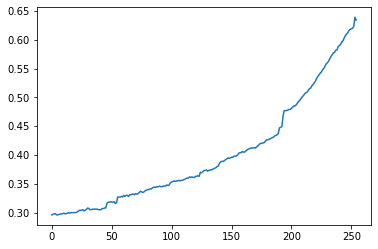

In [5]:
df.plot()

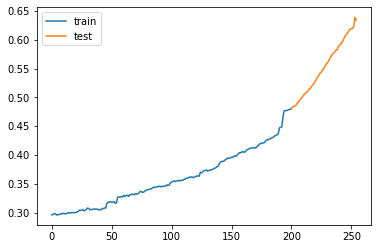

In [6]:
train = df.loc[:200,]
test = df.loc[200:,]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['Resistance']
df = pd.DataFrame(df)
df.columns = scale_cols
df_scaled = scaler.fit_transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled)
df_scaled_train = df_scaled.loc[:200,]
df_scaled_train.columns = scale_cols
#test_sc = sc.transform(test)

#train_sc
print(df_scaled_train)

df = pd.DataFrame(df)
df.columns = scale_cols
df_scaled_test = scaler.transform(df[scale_cols])

df_scaled = pd.DataFrame(df_scaled_test)
df_scaled_test = df_scaled.loc[200:,]
df_scaled_test.columns = scale_cols

print(df_scaled_test)


     Resistance
0      0.000000
1      0.002915
2      0.005831
3      0.005831
4      0.000000
..          ...
196    0.527697
197    0.530612
198    0.533528
199    0.533528
200    0.539359

[201 rows x 1 columns]
     Resistance
200    0.539359
201    0.545190
202    0.551020
203    0.551020
204    0.556851
205    0.565598
206    0.574344
207    0.580175
208    0.588921
209    0.597668
210    0.603499
211    0.612245
212    0.618076
213    0.620991
214    0.629738
215    0.638484
216    0.641399
217    0.653061
218    0.658892
219    0.667638
220    0.676385
221    0.690962
222    0.699708
223    0.708455
224    0.717201
225    0.723032
226    0.734694
227    0.740525
228    0.752187
229    0.763848
230    0.769679
231    0.778426
232    0.790087
233    0.801749
234    0.810496
235    0.819242
236    0.822157
237    0.833819
238    0.833819
239    0.851312
240    0.857143
241    0.862974
242    0.874636
243    0.880466
244    0.895044
245    0.906706
246    0.915452
247    0.921283


In [33]:
train_sc_df = pd.DataFrame(df_scaled_train, columns=['Resistance'], index=df_scaled_train.index)
test_sc_df = pd.DataFrame(df_scaled_test, columns=['Resistance'], index=df_scaled_test.index)
train_sc_df

,Resistance
0,0.000000
1,0.002915
2,0.005831
3,0.005831
4,0.000000
...,...
196,0.527697
197,0.530612
198,0.533528
199,0.533528


In [34]:
for s in range(1, 21):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Resistance'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Resistance'].shift(s)

train_sc_df.head(13)


,Resistance,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,...,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.002915,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.005831,0.002915,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.005831,0.005831,0.002915,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.005831,0.005831,0.002915,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,0.000000,0.005831,0.005831,0.002915,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.002915,0.000000,0.000000,0.005831,0.005831,0.002915,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.002915,0.002915,0.000000,0.000000,0.005831,0.005831,0.002915,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.005831,0.002915,0.002915,0.000000,0.000000,0.005831,0.005831,0.002915,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.005831,0.005831,0.002915,0.002915,0.000000,0.000000,0.005831,0.005831,0.002915,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
X_train = train_sc_df.dropna().drop('Resistance', axis=1)
y_train = train_sc_df.dropna()[['Resistance']]

X_test = test_sc_df.dropna().drop('Resistance', axis=1)
y_test = test_sc_df.dropna()[['Resistance']]

X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12,shift_13,shift_14,shift_15,shift_16,shift_17,shift_18,shift_19,shift_20
20,0.011662,0.011662,0.011662,0.011662,0.008746,0.011662,0.008746,0.005831,0.005831,0.008746,0.005831,0.005831,0.002915,0.002915,0.000000,0.000000,0.005831,0.005831,0.002915,0.000000
21,0.011662,0.011662,0.011662,0.011662,0.011662,0.008746,0.011662,0.008746,0.005831,0.005831,0.008746,0.005831,0.005831,0.002915,0.002915,0.000000,0.000000,0.005831,0.005831,0.002915
22,0.014577,0.011662,0.011662,0.011662,0.011662,0.011662,0.008746,0.011662,0.008746,0.005831,0.005831,0.008746,0.005831,0.005831,0.002915,0.002915,0.000000,0.000000,0.005831,0.005831
23,0.017493,0.014577,0.011662,0.011662,0.011662,0.011662,0.011662,0.008746,0.011662,0.008746,0.005831,0.005831,0.008746,0.005831,0.005831,0.002915,0.002915,0.000000,0.000000,0.005831
24,0.023324,0.017493,0.014577,0.011662,0.011662,0.011662,0.011662,0.011662,0.008746,0.011662,0.008746,0.005831,0.005831,0.008746,0.005831,0.005831,0.002915,0.002915,0.000000,0.000000


In [36]:
y_train.head()

,Resistance
20,0.011662
21,0.014577
22,0.017493
23,0.023324
24,0.023324


In [37]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

(181, 20)
[[0.01166181 0.01166181 0.01166181 ... 0.0058309  0.00291545 0.        ]
 [0.01166181 0.01166181 0.01166181 ... 0.0058309  0.0058309  0.00291545]
 [0.01457726 0.01166181 0.01166181 ... 0.         0.0058309  0.0058309 ]
 ...
 [0.53061224 0.52769679 0.52769679 ... 0.37900875 0.37900875 0.37026239]
 [0.5335277  0.53061224 0.52769679 ... 0.3819242  0.37900875 0.37900875]
 [0.5335277  0.5335277  0.53061224 ... 0.38483965 0.3819242  0.37900875]]
(181, 1)
[[0.01166181]
 [0.01457726]
 [0.01749271]
 [0.02332362]
 [0.02332362]
 [0.02332362]
 [0.02623907]
 [0.02040816]
 [0.02332362]
 [0.02915452]
 [0.03498542]
 [0.03206997]
 [0.02623907]
 [0.02623907]
 [0.02915452]
 [0.02915452]
 [0.02915452]
 [0.02915452]
 [0.02915452]
 [0.02623907]
 [0.02623907]
 [0.02623907]
 [0.03206997]
 [0.03206997]
 [0.03498542]
 [0.03498542]
 [0.05830904]
 [0.06413994]
 [0.06413994]
 [0.06705539]
 [0.06413994]
 [0.06413994]
 [0.06705539]
 [0.05830904]
 [0.06122449]
 [0.09037901]
 [0.09037901]
 [0.09037901]
 [0.0

In [38]:
X_train_t = X_train.reshape(X_train.shape[0], 20, 1)
X_test_t = X_test.reshape(X_test.shape[0], 20, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)


최종 DATA
(181, 20, 1)
[[[0.01166181]
  [0.01166181]
  [0.01166181]
  ...
  [0.0058309 ]
  [0.00291545]
  [0.        ]]

 [[0.01166181]
  [0.01166181]
  [0.01166181]
  ...
  [0.0058309 ]
  [0.0058309 ]
  [0.00291545]]

 [[0.01457726]
  [0.01166181]
  [0.01166181]
  ...
  [0.        ]
  [0.0058309 ]
  [0.0058309 ]]

 ...

 [[0.53061224]
  [0.52769679]
  [0.52769679]
  ...
  [0.37900875]
  [0.37900875]
  [0.37026239]]

 [[0.5335277 ]
  [0.53061224]
  [0.52769679]
  ...
  [0.3819242 ]
  [0.37900875]
  [0.37900875]]

 [[0.5335277 ]
  [0.5335277 ]
  [0.53061224]
  ...
  [0.38483965]
  [0.3819242 ]
  [0.37900875]]]
[[0.01166181]
 [0.01457726]
 [0.01749271]
 [0.02332362]
 [0.02332362]
 [0.02332362]
 [0.02623907]
 [0.02040816]
 [0.02332362]
 [0.02915452]
 [0.03498542]
 [0.03206997]
 [0.02623907]
 [0.02623907]
 [0.02915452]
 [0.02915452]
 [0.02915452]
 [0.02915452]
 [0.02915452]
 [0.02623907]
 [0.02623907]
 [0.02623907]
 [0.03206997]
 [0.03206997]
 [0.03498542]
 [0.03498542]
 [0.05830904]
 [0.064

In [59]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 

K.clear_session() 
model = Sequential() # Sequeatial Model 
model.add(LSTM(30, input_shape=(20, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                3840      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________


In [61]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

h = model.fit(X_train_t, y_train, epochs=100,
          batch_size=30, verbose=1, callbacks=[early_stop], validation_data=(X_test_t, y_test))

Train on 181 samples, validate on 35 samples
Epoch 1/100
181/181 [==============================] - 0s 1ms/step - loss: 2.9910e-04 - val_loss: 0.0253
Epoch 2/100
181/181 [==============================] - 0s 752us/step - loss: 2.8664e-04 - val_loss: 0.0343
Epoch 3/100
181/181 [==============================] - 0s 729us/step - loss: 2.8433e-04 - val_loss: 0.0167
Epoch 4/100
181/181 [==============================] - 0s 735us/step - loss: 2.5444e-04 - val_loss: 0.0236
Epoch 5/100
181/181 [==============================] - 0s 735us/step - loss: 2.3732e-04 - val_loss: 0.0275
Epoch 6/100
181/181 [==============================] - 0s 718us/step - loss: 2.3839e-04 - val_loss: 0.0271
Epoch 00006: early stopping


In [62]:
print(h.history.keys())

dict_keys(['val_loss', 'loss'])


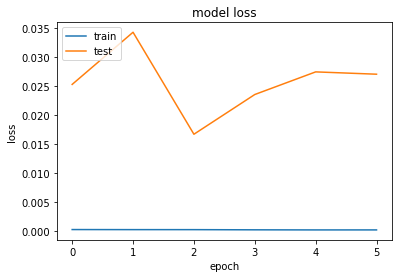

In [63]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
y_pred = model.predict(X_test_t)
print(X_test_t.shape)
print(X_test_t)
print(y_pred.shape)
print(y_pred)

(35, 20, 1)
[[[0.66763848]
  [0.65889213]
  [0.65306122]
  [0.64139942]
  [0.63848397]
  [0.62973761]
  [0.62099125]
  [0.6180758 ]
  [0.6122449 ]
  [0.60349854]
  [0.59766764]
  [0.58892128]
  [0.58017493]
  [0.57434402]
  [0.56559767]
  [0.55685131]
  [0.55102041]
  [0.55102041]
  [0.5451895 ]
  [0.5393586 ]]

 [[0.67638484]
  [0.66763848]
  [0.65889213]
  [0.65306122]
  [0.64139942]
  [0.63848397]
  [0.62973761]
  [0.62099125]
  [0.6180758 ]
  [0.6122449 ]
  [0.60349854]
  [0.59766764]
  [0.58892128]
  [0.58017493]
  [0.57434402]
  [0.56559767]
  [0.55685131]
  [0.55102041]
  [0.55102041]
  [0.5451895 ]]

 [[0.6909621 ]
  [0.67638484]
  [0.66763848]
  [0.65889213]
  [0.65306122]
  [0.64139942]
  [0.63848397]
  [0.62973761]
  [0.62099125]
  [0.6180758 ]
  [0.6122449 ]
  [0.60349854]
  [0.59766764]
  [0.58892128]
  [0.58017493]
  [0.57434402]
  [0.56559767]
  [0.55685131]
  [0.55102041]
  [0.55102041]]

 [[0.69970845]
  [0.6909621 ]
  [0.67638484]
  [0.66763848]
  [0.65889213]
  [0.65

In [54]:
y = pd.DataFrame(X_test_t.iloc[;,0])
y1 = pd.DataFrame(y_pred)

SyntaxError: invalid syntax (<ipython-input-54-e3eaa45fc6c9>, line 1)

<AxesSubplot:>

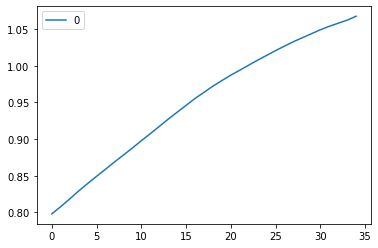

In [53]:
y1.plot()

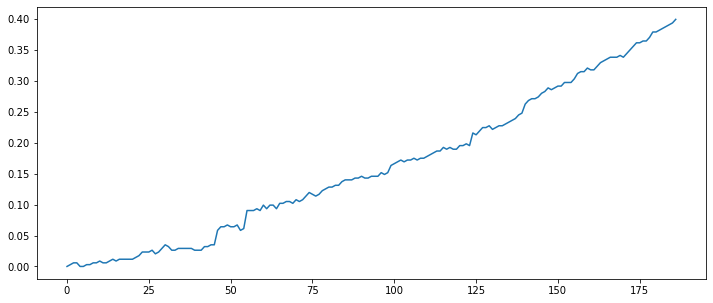

In [18]:
plt.figure(figsize=(12,5))
plt.plot(x_train[:,0,0])
plt.show()

0      0.298
1      0.298
2      0.297
3      0.299
4      0.298
       ...  
253    0.316
254    0.316
255    0.315
256    0.318
257    0.316
Name: Resistance, Length: 258, dtype: float64
(237, 20, 1)
237
(237, 20, 1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 

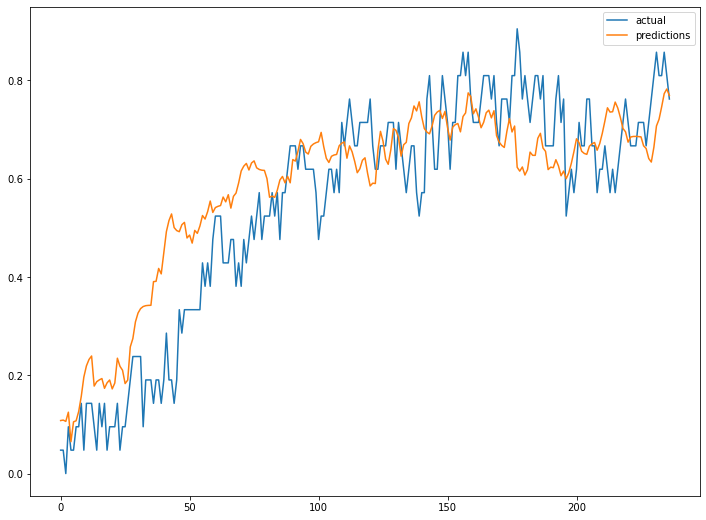

In [32]:
test_df = pd.read_csv('../omona/testset/J0003_0024_0221_20110307012732_cell_03.csv', encoding='utf8')
x_test_no_kf = test_df['Resistance']
x_test2 = test_df['Resistance']
print(x_test2)
x_test2 = pd.DataFrame(x_test2)
scale_cols = ['Resistance']
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2[scale_cols])
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2
train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

print(train_feature2.shape)
print(len(train_feature2))
train_length = len(train_feature2)
x_test = train_feature2[:]

predictions = model.predict(train_feature2)
print(x_test.shape)
predictions.shape

feature_len = len(train_feature2)
plot_len = feature_len-OUT_STEPS

x = []
for i in range(len(x_test_no_kf)):
    x.append(i)    
    
y = []
for i in predictions:
   y.append(i[0])

print(x)
print(y)

#x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0, 0], label ='actual')
plt.plot(y[:], label='predictions')
#plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

0      0.355
1      0.352
2      0.351
3      0.353
4      0.352
       ...  
251    0.646
252    0.649
253    0.650
254    0.655
255    0.657
Name: Resistance, Length: 256, dtype: float64
(235, 20, 1)
235
(235, 20, 1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 

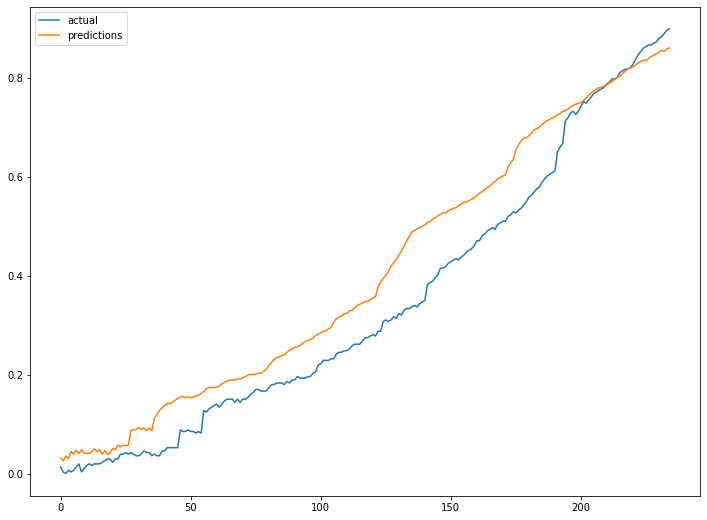

In [33]:
test_df = pd.read_csv('../omona/testset/J0003_0024_0221_20110307012732_cell_06.csv', encoding='utf8')
x_test_no_kf = test_df['Resistance']
x_test2 = test_df['Resistance']
print(x_test2)
x_test2 = pd.DataFrame(x_test2)
scale_cols = ['Resistance']
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2[scale_cols])
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2
train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

print(train_feature2.shape)
print(len(train_feature2))
train_length = len(train_feature2)
x_test = train_feature2[:]

predictions = model.predict(train_feature2)
print(x_test.shape)
predictions.shape

feature_len = len(train_feature2)
plot_len = feature_len-OUT_STEPS

x = []
for i in range(len(x_test_no_kf)):
    x.append(i)    
    
y = []
for i in predictions:
   y.append(i[0])

print(x)
print(y)

#x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0, 0], label ='actual')
plt.plot(y[:], label='predictions')
#plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

0      0.317
1      0.316
2      0.316
3      0.315
4      0.315
       ...  
250    0.678
251    0.680
252    0.682
253    0.697
254    0.691
Name: Resistance, Length: 255, dtype: float64
(234, 20, 1)
234
(234, 20, 1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 

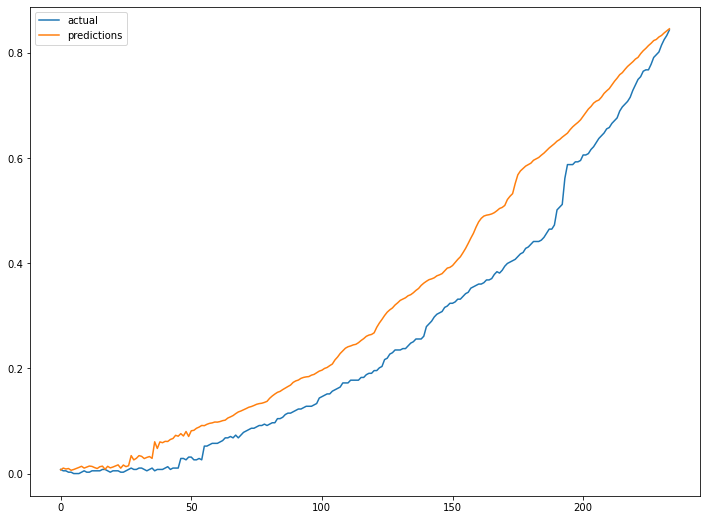

In [34]:
test_df = pd.read_csv('../omona/testset/J0003_0024_0221_20110307012732_cell_7.csv', encoding='utf8')
x_test_no_kf = test_df['Resistance']
x_test2 = test_df['Resistance']
print(x_test2)
x_test2 = pd.DataFrame(x_test2)
scale_cols = ['Resistance']
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2[scale_cols])
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2
train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

print(train_feature2.shape)
print(len(train_feature2))
train_length = len(train_feature2)
x_test = train_feature2[:]

predictions = model.predict(train_feature2)
print(x_test.shape)
predictions.shape

feature_len = len(train_feature2)
plot_len = feature_len-OUT_STEPS

x = []
for i in range(len(x_test_no_kf)):
    x.append(i)    
    
y = []
for i in predictions:
   y.append(i[0])

print(x)
print(y)

#x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2[:, 0, 0], label ='actual')
plt.plot(y[:], label='predictions')
#plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

num 0 8.71992864106824 actual 0.7916666666666661 prediction 0.7226339
num 1 7.147231854890452 actual 0.7916666666666661 prediction 0.7350844
num 2 2.4192860251978097 actual 0.7916666666666661 prediction 0.772514
num 3 2.016758918762207 actual 0.75 prediction 0.7651257
num 4 3.126003867701408 actual 0.7916666666666661 prediction 0.76691914
num 5 10.669898986816406 actual 0.75 prediction 0.83002424
num 6 0.7803392410279025 actual 0.8333333333333339 prediction 0.8268305
num 7 8.514809608459394 actual 0.8333333333333339 prediction 0.9042901
num 8 0.41156682101169484 actual 0.9166666666666661 prediction 0.92043936
num 9 4.0029401364534385 actual 0.9583333333333339 prediction 0.9199718
num 10 1.9266418788743425 actual 0.9583333333333339 prediction 0.976797
num 11 0.48144381979243583 actual 0.9583333333333339 prediction 0.9537195
num 12 4.0717995685079185 actual 0.9583333333333339 prediction 0.99735475
num 13 1.0123066280199746 actual 0.9583333333333339 prediction 0.94863206
num 14 8.74761234

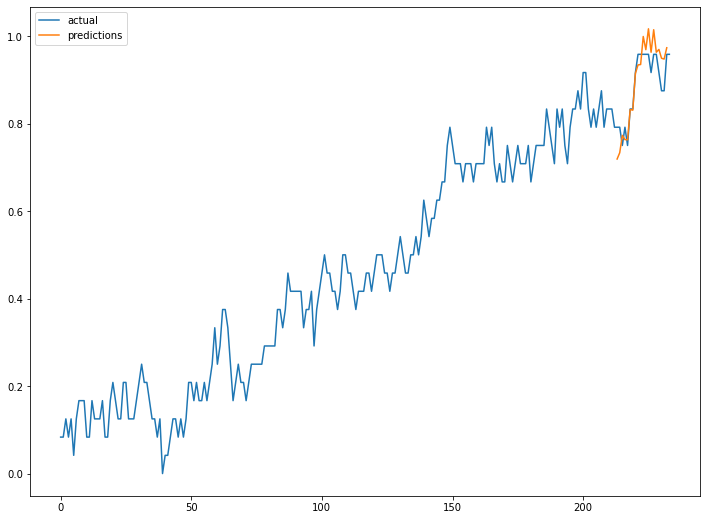

In [22]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_9.csv', encoding='utf8')
x_test_no_kf = test_df['Resistance']
x_test2 = test_df['Resistance']

n_samples = len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

x_test_no_kf = pd.DataFrame(x_test_no_kf)
x_test_no_kf.columns = scale_cols
x_test_no_kf = scaler.fit_transform(x_test_no_kf)
x_test_no_kf = pd.DataFrame(x_test_no_kf)
y_test_no_kf = x_test_no_kf

train_feature2_no_kf, train_label2_no_kf = make_dataset(x_test_no_kf, y_test_no_kf, forecasting)

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

error = error_rate(train_feature2_no_kf, predictions, plot_len, forecasting)
print(error)

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2_no_kf[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

num 0 12.926965010793573 actual 0.8482142857142856 prediction 0.7385659
num 1 11.52720848719275 actual 0.8571428571428568 prediction 0.7583382
num 2 6.55688737568101 actual 0.8482142857142856 prediction 0.79259783
num 3 8.807928275063373 actual 0.8526785714285712 prediction 0.77757525
num 4 10.815949784111712 actual 0.8660714285714284 prediction 0.7723976
num 5 2.331270490373884 actual 0.875 prediction 0.8546014
num 6 3.7702860565959964 actual 0.8794642857142856 prediction 0.84630597
num 7 5.8324468794780016 actual 0.8883928571428568 prediction 0.9402079
num 8 8.315273246379846 actual 0.8839285714285712 prediction 0.95742965
num 9 6.920582565230986 actual 0.8883928571428568 prediction 0.9498748
num 10 16.10424735329371 actual 0.8839285714285712 prediction 1.0262786
num 11 9.556466102600107 actual 0.8928571428571428 prediction 0.97818273
num 12 13.728825408633433 actual 0.901785714285714 prediction 1.0255903
num 13 5.31988472774111 actual 0.90625 prediction 0.95446146
num 14 11.80648803

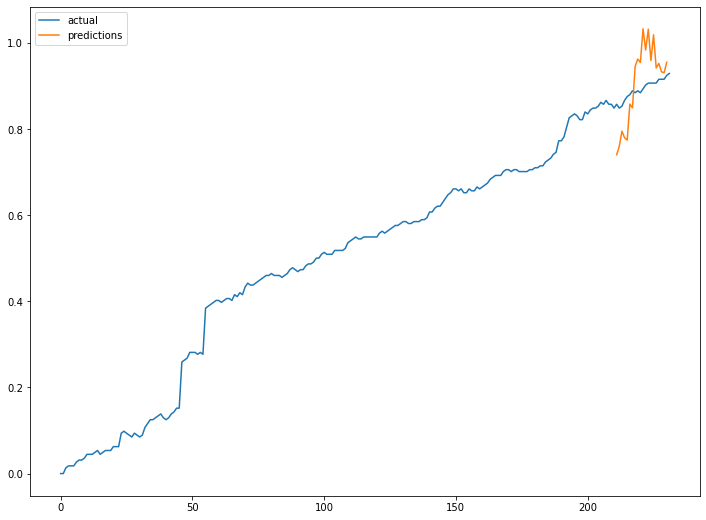

In [23]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_18.csv', encoding='utf8')
x_test_no_kf = test_df['Resistance']
x_test2 = test_df['Resistance']

n_samples = len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

x_test_no_kf = pd.DataFrame(x_test_no_kf)
x_test_no_kf.columns = scale_cols
x_test_no_kf = scaler.fit_transform(x_test_no_kf)
x_test_no_kf = pd.DataFrame(x_test_no_kf)
y_test_no_kf = x_test_no_kf

train_feature2_no_kf, train_label2_no_kf = make_dataset(x_test_no_kf, y_test_no_kf, forecasting)

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

error = error_rate(train_feature2_no_kf, predictions, plot_len, forecasting)
print(error)

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2_no_kf[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

num 0 12.874088567846107 actual 0.8500000000000014 prediction 0.74057025
num 1 4.729276895523156 actual 0.8000000000000007 prediction 0.7621658
num 2 5.387028058369955 actual 0.75 prediction 0.7904027
num 3 2.8403600056966143 actual 0.75 prediction 0.7713027
num 4 2.041959762573242 actual 0.75 prediction 0.7653147
num 5 13.193416595458984 actual 0.75 prediction 0.8489506
num 6 19.73328249795078 actual 0.7000000000000011 prediction 0.838133
num 7 32.7423197882514 actual 0.7000000000000011 prediction 0.92919624
num 8 45.15662193298332 actual 0.6500000000000004 prediction 0.94351804
num 9 33.651077747344765 actual 0.7000000000000011 prediction 0.93555754
num 10 34.38976605733235 actual 0.75 prediction 1.0079232
num 11 27.61859893798828 actual 0.75 prediction 0.9571395
num 12 42.92211191994782 actual 0.7000000000000011 prediction 1.0004548
num 13 32.49262741633804 actual 0.7000000000000011 prediction 0.9274484
num 14 23.223416507244004 actual 0.8000000000000007 prediction 0.98578733
num 15

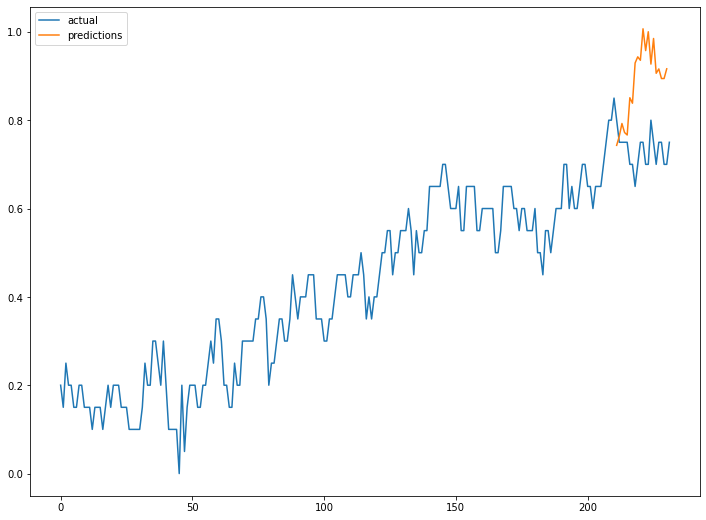

In [24]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_19.csv', encoding='utf8')
x_test_no_kf = test_df['Resistance']
x_test2 = test_df['Resistance']

n_samples = len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

x_test_no_kf = pd.DataFrame(x_test_no_kf)
x_test_no_kf.columns = scale_cols
x_test_no_kf = scaler.fit_transform(x_test_no_kf)
x_test_no_kf = pd.DataFrame(x_test_no_kf)
y_test_no_kf = x_test_no_kf

train_feature2_no_kf, train_label2_no_kf = make_dataset(x_test_no_kf, y_test_no_kf, forecasting)

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

error = error_rate(train_feature2_no_kf, predictions, plot_len, forecasting)
print(error)

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2_no_kf[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

num 0 13.189190998673341 actual 0.8421052631578938 prediction 0.7310384
num 1 13.724162361838582 actual 0.8684210526315788 prediction 0.74923754
num 2 7.568241283297436 actual 0.8421052631578938 prediction 0.7783727
num 3 11.607775182434988 actual 0.8684210526315788 prediction 0.7676167
num 4 11.869091698617627 actual 0.8684210526315788 prediction 0.76534736
num 5 0.8889812976120802 actual 0.8421052631578938 prediction 0.8346191
num 6 1.646585233749981 actual 0.8157894736842097 prediction 0.82922214
num 7 11.639456979690168 actual 0.8157894736842097 prediction 0.91074294
num 8 9.800964593887452 actual 0.8421052631578938 prediction 0.9246397
num 9 8.857616037130477 actual 0.8421052631578938 prediction 0.9166957
num 10 13.042389624046583 actual 0.8684210526315788 prediction 0.9816839
num 11 11.74959465861333 actual 0.8421052631578938 prediction 0.9410492
num 12 9.783824051127754 actual 0.8947368421052628 prediction 0.9822763
num 13 6.229505033204073 actual 0.8684210526315788 prediction 0

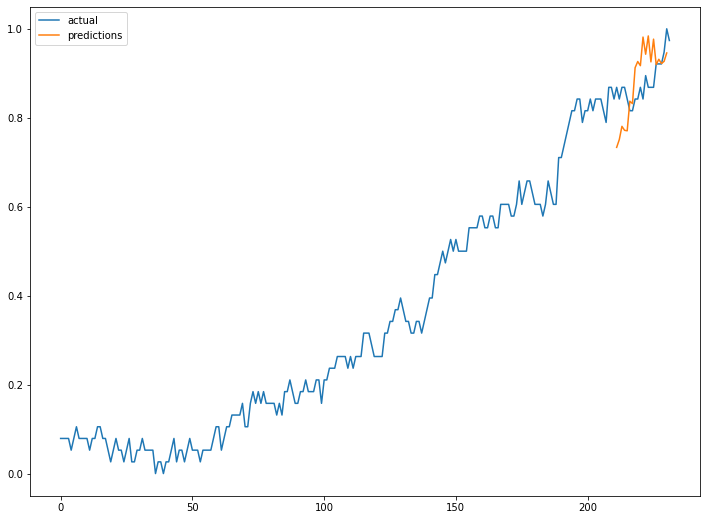

In [25]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_20.csv', encoding='utf8')
x_test_no_kf = test_df['Resistance']
x_test2 = test_df['Resistance']

n_samples = len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

x_test_no_kf = pd.DataFrame(x_test_no_kf)
x_test_no_kf.columns = scale_cols
x_test_no_kf = scaler.fit_transform(x_test_no_kf)
x_test_no_kf = pd.DataFrame(x_test_no_kf)
y_test_no_kf = x_test_no_kf

train_feature2_no_kf, train_label2_no_kf = make_dataset(x_test_no_kf, y_test_no_kf, forecasting)

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

error = error_rate(train_feature2_no_kf, predictions, plot_len, forecasting)
print(error)

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2_no_kf[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

num 0 8.54519724845896 actual 0.76923076923077 prediction 0.7034985
num 1 1.830311825401033 actual 0.7307692307692317 prediction 0.7173939
num 2 1.8020623608638031 actual 0.7307692307692317 prediction 0.74393815
num 3 1.2421564051978142 actual 0.7307692307692317 prediction 0.7398465
num 4 6.934426228205469 actual 0.6923076923076916 prediction 0.74031526
num 5 3.1721407175062986 actual 0.76923076923077 prediction 0.79363185
num 6 1.4062336512975164 actual 0.8076923076923084 prediction 0.79633427
num 7 6.711484137035462 actual 0.8076923076923084 prediction 0.86190045
num 8 3.3093804662877195 actual 0.8461538461538467 prediction 0.8741563
num 9 7.8764166150773365 actual 0.8076923076923084 prediction 0.8713095
num 10 19.869971275329462 actual 0.76923076923077 prediction 0.9220767
num 11 16.186029314994688 actual 0.76923076923077 prediction 0.8937387
num 12 20.802701711654535 actual 0.76923076923077 prediction 0.92925155
num 13 9.99737183252961 actual 0.8076923076923084 prediction 0.8884403

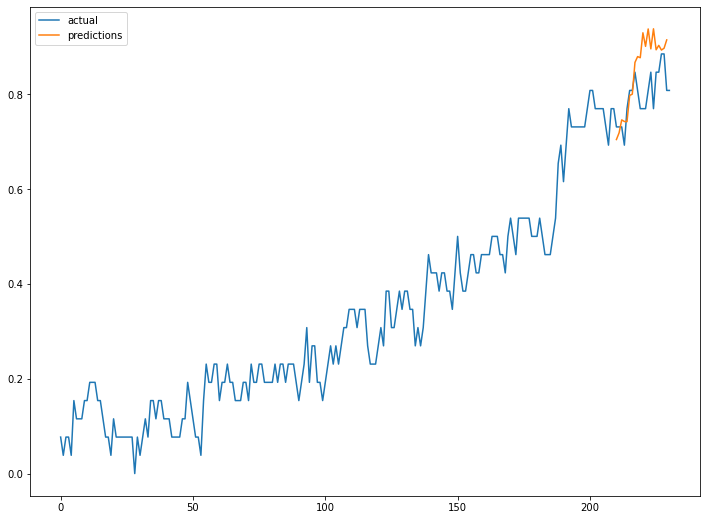

In [26]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_22.csv', encoding='utf8')
x_test_no_kf = test_df['Resistance']
x_test2 = test_df['Resistance']

n_samples = len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

x_test_no_kf = pd.DataFrame(x_test_no_kf)
x_test_no_kf.columns = scale_cols
x_test_no_kf = scaler.fit_transform(x_test_no_kf)
x_test_no_kf = pd.DataFrame(x_test_no_kf)
y_test_no_kf = x_test_no_kf

train_feature2_no_kf, train_label2_no_kf = make_dataset(x_test_no_kf, y_test_no_kf, forecasting)

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

error = error_rate(train_feature2_no_kf, predictions, plot_len, forecasting)
print(error)

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2_no_kf[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()

num 0 8.109954595565766 actual 0.7389162561576352 prediction 0.6789905
num 1 7.885692229396415 actual 0.7487684729064039 prediction 0.6897229
num 2 5.38432064399216 actual 0.7536945812807878 prediction 0.71311325
num 3 6.120860576629607 actual 0.7586206896551722 prediction 0.7121866
num 4 7.152747038083193 actual 0.7684729064039408 prediction 0.713506
num 5 2.007581056303286 actual 0.7733990147783252 prediction 0.7578724
num 6 1.7071719411052875 actual 0.7783251231527091 prediction 0.7650378
num 7 4.569904759245123 actual 0.7832512315270934 prediction 0.81904507
num 8 5.222646221518526 actual 0.7881773399014778 prediction 0.82934105
num 9 4.78907175686048 actual 0.7931034482758621 prediction 0.83108574
num 10 9.164985756815259 actual 0.798029556650246 prediction 0.87116885
num 11 6.66820381158668 actual 0.798029556650246 prediction 0.8512438
num 12 9.123988086130574 actual 0.8078817733990147 prediction 0.8815928
num 13 3.676494795405251 actual 0.8226600985221673 prediction 0.85290515
n

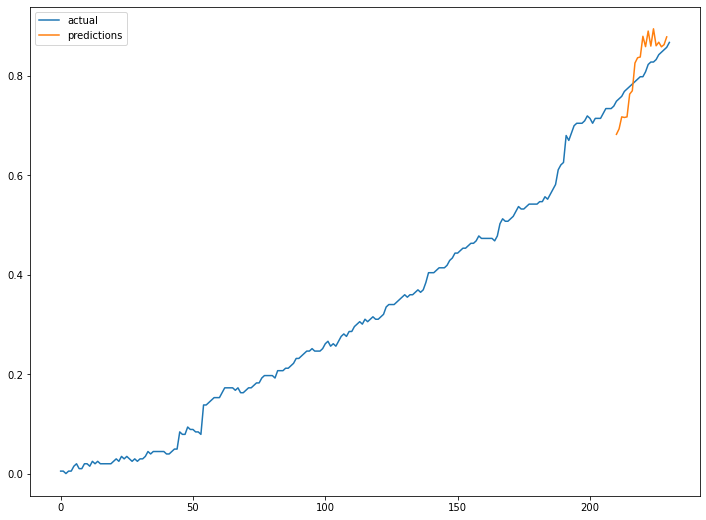

In [27]:
test_df = pd.read_csv('testset/J0003_0024_0221_20110307012732_cell_23.csv', encoding='utf8')
x_test_no_kf = test_df['Resistance']
x_test2 = test_df['Resistance']

n_samples = len(x_test2)
x_0 = x_test2[1]

r_meas_save = np.zeros(n_samples)
r_esti_save = np.zeros(n_samples)

x_esti, P = None, None
for i in range(n_samples):
    r_meas = x_test2[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(r_meas, x_esti, P)
        # print(x_esti[1])
    r_meas_save[i] = r_meas
    r_esti_save[i] = x_esti

#print("123", x_esti)

x_test2 = r_esti_save

x_test2 = pd.DataFrame(x_test2)
x_test2.columns = scale_cols
x_test2 = scaler.fit_transform(x_test2)
x_test2 = pd.DataFrame(x_test2)
y_test2 = x_test2

x_test_no_kf = pd.DataFrame(x_test_no_kf)
x_test_no_kf.columns = scale_cols
x_test_no_kf = scaler.fit_transform(x_test_no_kf)
x_test_no_kf = pd.DataFrame(x_test_no_kf)
y_test_no_kf = x_test_no_kf

train_feature2_no_kf, train_label2_no_kf = make_dataset(x_test_no_kf, y_test_no_kf, forecasting)

train_feature2, train_label2 = make_dataset(x_test2, y_test2, forecasting)

predictions = model.predict(train_feature2)

feature_len = len(train_feature2) - 1
plot_len = feature_len-OUT_STEPS

error = error_rate(train_feature2_no_kf, predictions, plot_len, forecasting)
print(error)

x_data = range(feature_len)
plt.figure(figsize=(12, 9))
plt.plot(train_feature2_no_kf[:, 0,0], label ='actual')
plt.plot(x_data[plot_len:], predictions[plot_len,:,0], label='predictions')
plt.legend()